<a href="https://colab.research.google.com/github/MERITOKAMIL/ML_PRO/blob/master/ML_Pro_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression



In [2]:
X, y = fetch_california_housing(return_X_y=True)
print(X, y)
print(X.shape, y.shape)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]] [4.526 3.585 3.521 ... 0.923 0.847 0.894]
(20640, 8) (20640,)


In [3]:
model = LinearRegression()
model.fit(X,y)

predictions=model.predict(X)

In [4]:
differences=predictions-y

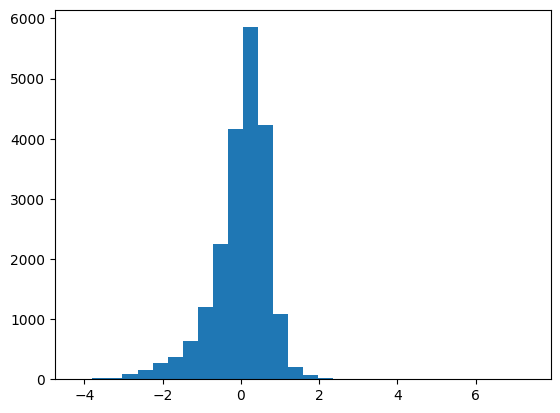

In [5]:
plt.hist(differences, bins=30)
plt.show()


In [6]:
np.abs(differences).mean()

0.5311643817546476

In [7]:
mean_absolute_error(y,predictions)

0.5311643817546476

In [8]:
mean_squared_error(y,predictions)

0.5243209861846072

In [9]:
root_mean_squared_error(y,predictions)

0.7241001216576387

#Classification

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve,classification_report

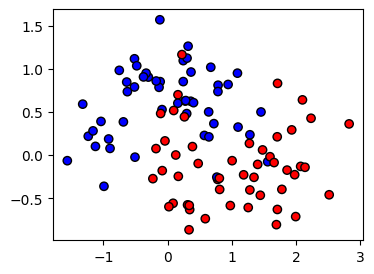

In [11]:
X, y=make_moons(n_samples=100, noise=0.3, random_state=42)

plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',cmap="bwr")
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [13]:
 #Step size in mesh
 h =.02
 x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 y_min, y_max = X[:,1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [14]:
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)

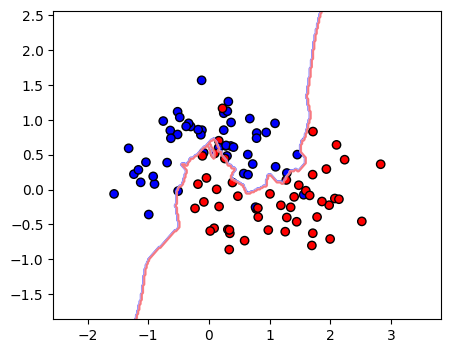

In [15]:
plt.figure(figsize=(5,4))
plt.contour(xx, yy, z, alpha=0.5, cmap="bwr")
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',cmap="bwr")
plt.show()

In [16]:
y_pred=knn.predict(X)
cm=confusion_matrix(y,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[45  5]
 [ 2 48]]


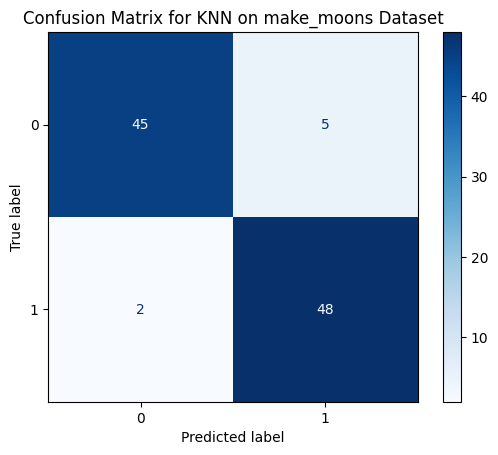

In [17]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN on make_moons Dataset")
plt.show()

In [19]:
accuracy_score(y,y_pred)

0.93

In [20]:
precision_score(y,y_pred)

0.9056603773584906

In [23]:
recall_score(y,y_pred)

0.96

In [28]:
knn.predict_proba(X)[:,1]

array([1.        , 0.33333333, 0.66666667, 0.        , 0.66666667,
       0.        , 0.33333333, 1.        , 0.        , 0.66666667,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.66666667, 0.        , 0.66666667,
       0.33333333, 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.33333333, 1.        ,
       0.        , 1.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.33333333, 1.        , 0.33333333, 1.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.        ,
       0.66666667, 0.33333333, 1.        , 0.        , 0.66666667,
       0.66666667, 0.66666667, 0.33333333, 0.        , 0.66666667,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.     

In [29]:
precision, recall, thresholds = precision_recall_curve(y, knn.predict_proba(X)[:,1])

In [30]:
precision

array([0.5       , 0.78125   , 0.90566038, 1.        , 1.        ])

In [31]:
recall

array([1.  , 1.  , 0.96, 0.7 , 0.  ])

In [32]:
thresholds

array([0.        , 0.33333333, 0.66666667, 1.        ])

<ipython-input-34-7a59bae3d063>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


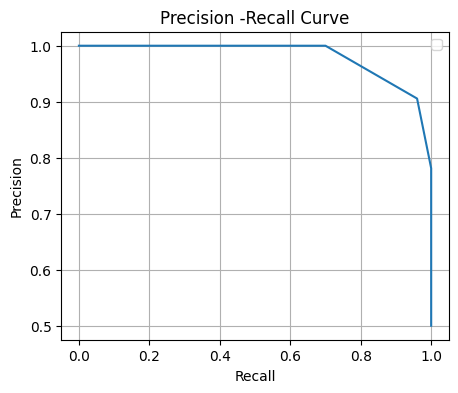

In [34]:
plt.figure(figsize=(5,4))
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision -Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

In [37]:
f1_score(y,y_pred)

0.9320388349514563

In [41]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.91      0.96      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

